# 00 - City blocks

In [1]:
import sys
sys.path.append('..')

from osmuf.core import *

In [2]:
# dictionary of places of interest for convenience, 
places = {'posadas' : (-27.37577,-55.90059),
          'kaduna' : (10.53364, 7.37360),
          'buenos_aires' : (-34.5798,-58.4422), #57897,44013
          'margery_street' : (51.5266,-0.1109),
          'welwyn_garden_city': (51.7938,-0.18645)}

In [3]:
place='margery_street'
point=places[place]
distance=500 # in meters

In [4]:
city_blocks, city_blocks_gross, city_blocks_gross_raw = city_blocks_from_point(point, distance)

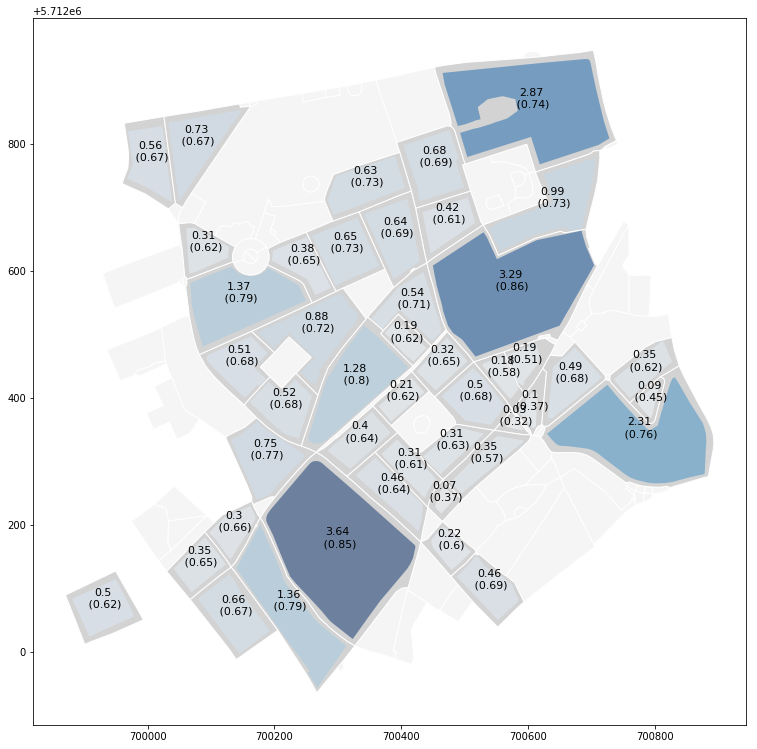

In [5]:
ax = city_blocks_gross_raw.plot(color='whitesmoke', edgecolor='white', figsize=(16,13));

city_blocks_gross.plot(ax=ax, color='lightgrey',edgecolor='white');

city_blocks.plot(ax=ax, column='area_net_ha', cmap='Blues', alpha=0.5);

# label style
style = dict(size=11, color='black', horizontalalignment='center')

# show areas of gross city blocks
for idx, row in city_blocks.iterrows():
    label = str(round((row.area_net_ha),2)) + '\n (' + str(round((row.net_to_gross),2)) + ')'
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, label, **style)

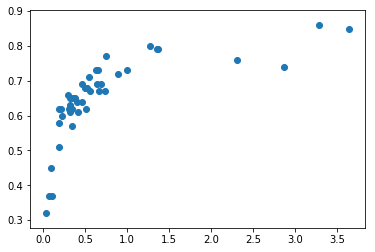

In [6]:
plt.scatter(city_blocks.area_net_ha, city_blocks.net_to_gross)